In [120]:
import pandas as pd 
import numpy as np
import seaborn as sns

from sklearn.impute import SimpleImputer

from sklearn.impute import KNNImputer

import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler

In [121]:
bf_inicial = pd.read_csv("bodyfat.csv")
bf_inicial.Weight, bf_inicial.Height = bf_inicial.Weight*0.453592, bf_inicial.Height*2.54
bf_inicial.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,69.966566,172.085,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,78.584814,183.515,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,69.853168,168.275,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,83.801122,183.515,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,83.574326,180.975,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


e:\Apps\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


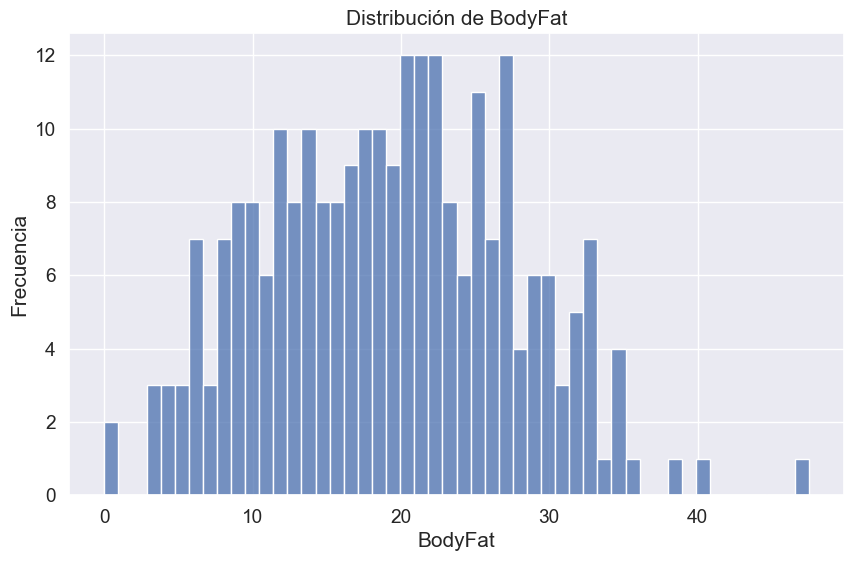

In [122]:
# Crear un histograma para la columna "BodyFat"
plt.figure(figsize=(10, 6))
sns.histplot(bf_inicial['BodyFat'], bins=50)  # kde=True agrega la densidad estimada
plt.title('Distribución de BodyFat')
plt.xlabel('BodyFat')
plt.ylabel('Frecuencia')

plt.show()

e:\Apps\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Apps\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Apps\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Apps\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

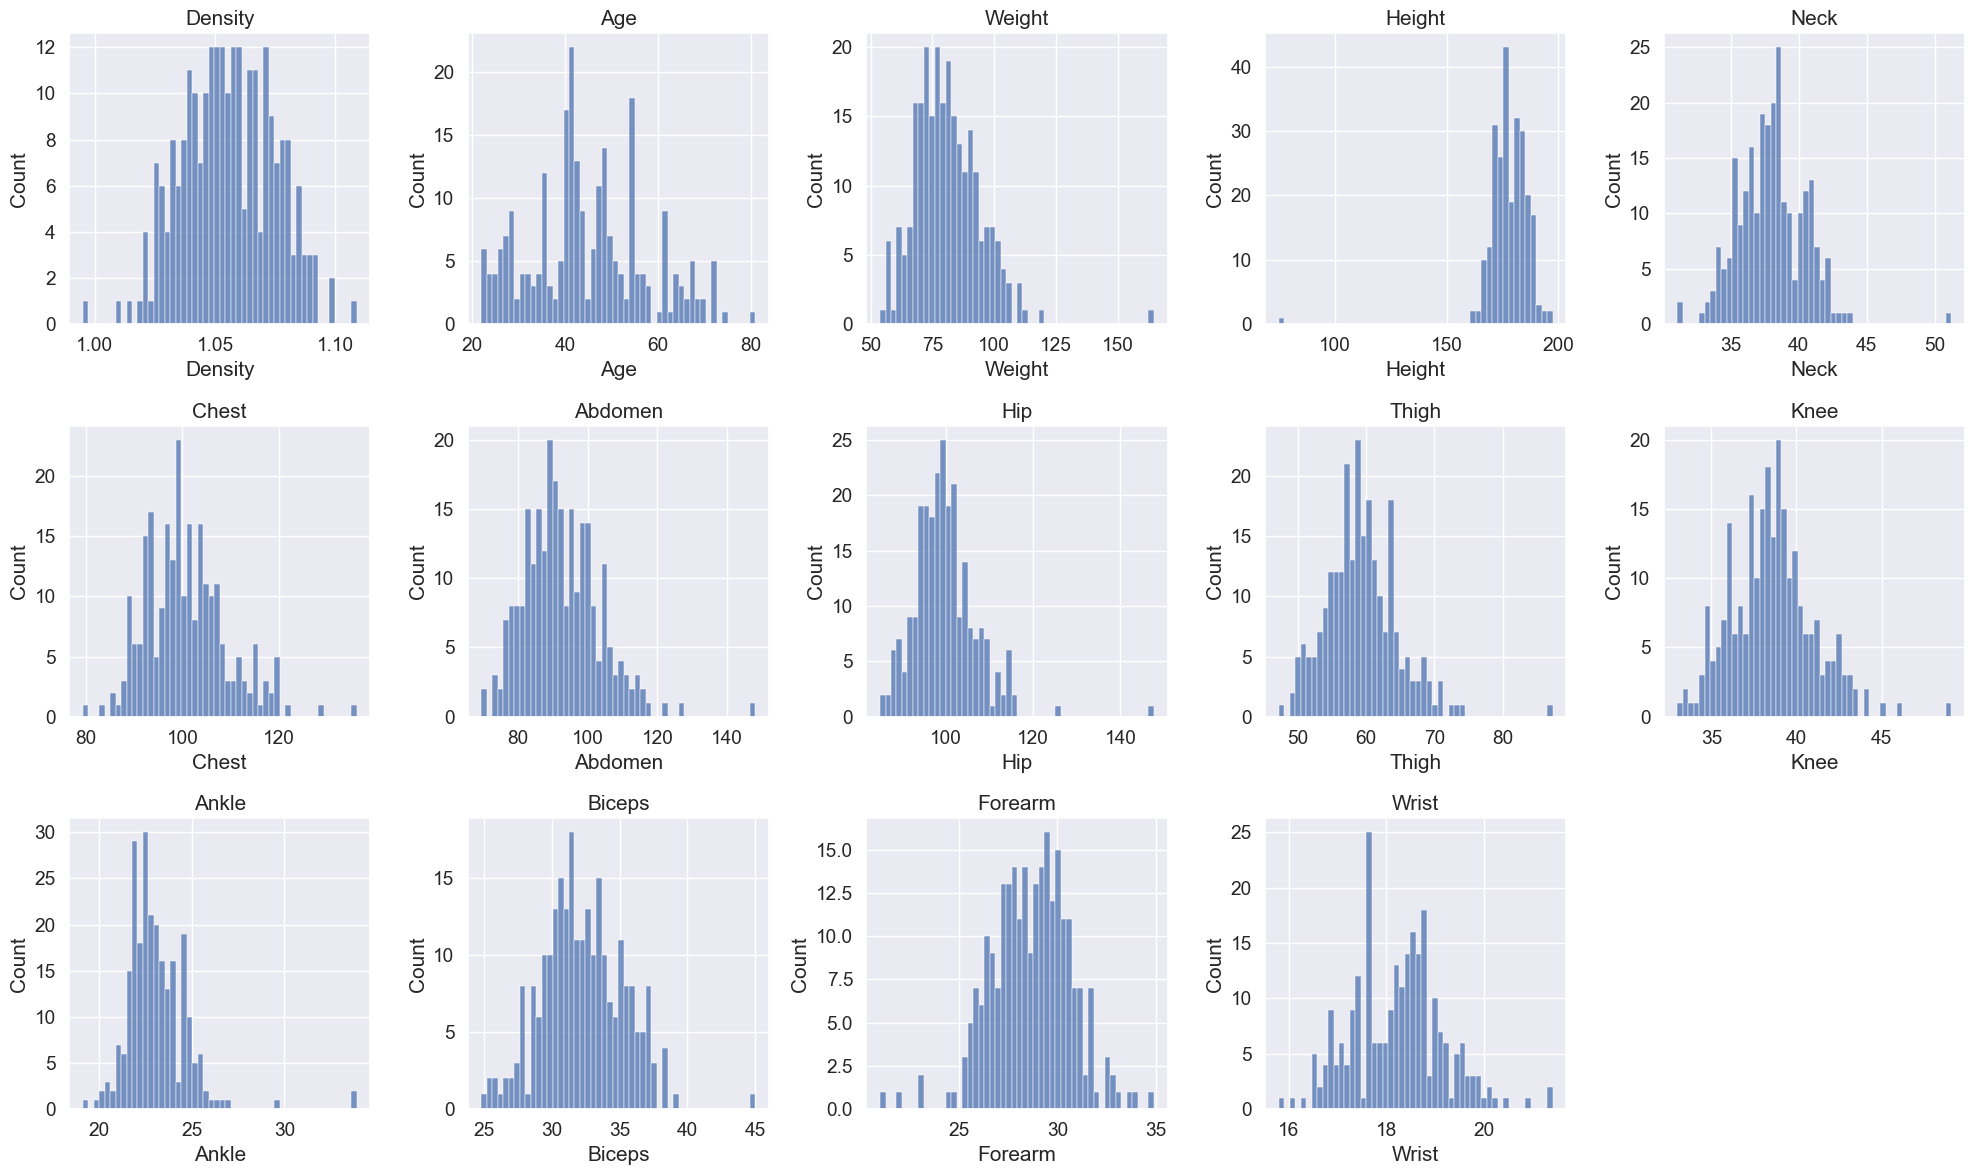

In [123]:
# Copiar el DataFrame y eliminar la columna "BodyFat"
df_prov = bf_inicial.copy()
df_prov.drop(columns="BodyFat", inplace=True)

# Calcular el número de columnas y filas necesarias
num_columns = len(df_prov.columns)
num_rows = 3
num_cols_per_row = (num_columns + num_rows - 1) // num_rows  # Redondeo hacia arriba

fig, ax = plt.subplots(num_rows, num_cols_per_row, figsize=(20, 12))

# Iterar sobre las columnas para crear los subgráficos
for idx, col in enumerate(df_prov.columns):
    row = idx // num_cols_per_row
    col_pos = idx % num_cols_per_row
    sns.histplot(df_prov.iloc[:, idx], ax=ax[row][col_pos], bins=50)
    ax[row][col_pos].set_title(df_prov.columns[idx])

# Eliminar los subgráficos vacíos
for i in range(num_columns, num_rows * num_cols_per_row):
    fig.delaxes(ax[i // num_cols_per_row][i % num_cols_per_row])

plt.tight_layout()
plt.show()

* Verificamos tipos de datos del dataframe

In [124]:
bf_inicial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


# Limpieza de datos

## vemos nulos en el dataframe

In [125]:
columns_nulls = bf_inicial.isnull().sum()/len(bf_inicial)*100
columns_nulls

Density    0.0
BodyFat    0.0
Age        0.0
Weight     0.0
Height     0.0
Neck       0.0
Chest      0.0
Abdomen    0.0
Hip        0.0
Thigh      0.0
Knee       0.0
Ankle      0.0
Biceps     0.0
Forearm    0.0
Wrist      0.0
dtype: float64

## como es todo nulos y todo numeros hacemos correlaciones heatmap y los hist

e:\Apps\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


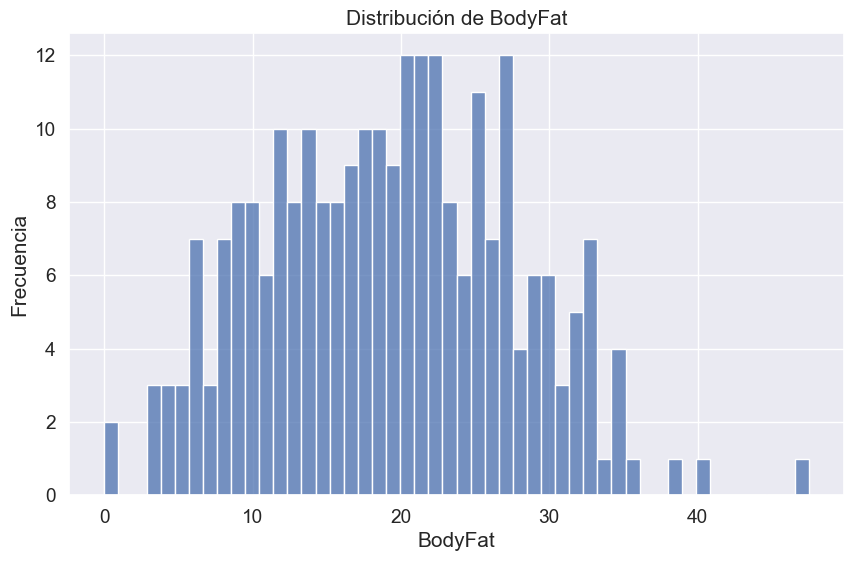

In [126]:
plt.figure(figsize=(10, 6))
sns.histplot(bf_inicial['BodyFat'], bins=50)
plt.title('Distribución de BodyFat')
plt.xlabel('BodyFat')
plt.ylabel('Frecuencia')
plt.show()

<Axes: >

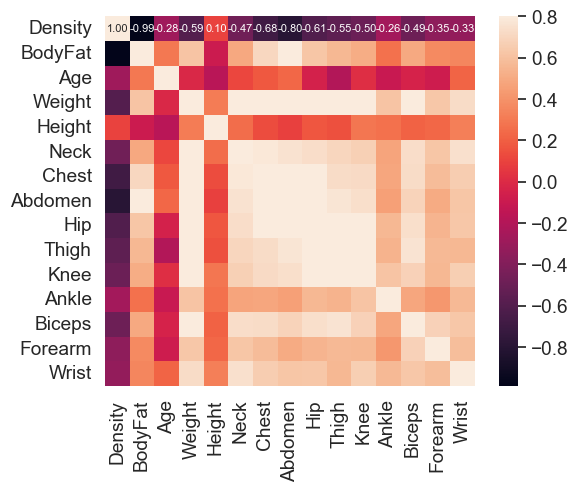

In [127]:
corrmat = bf_inicial.corr()
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, fmt='.2f', annot_kws={'size': 8})

In [128]:
corrmat

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
Density,1.000000,-0.987782,-0.277637,-0.594062,0.097881,-0.472966,-0.682599,-0.798955,-0.609331,-0.553091,-0.495040,-0.264890,-0.487109,-0.351648,-0.325716
BodyFat,-0.987782,1.000000,0.291458,0.612414,-0.089495,0.490592,0.702620,0.813432,0.625201,0.559608,0.508665,0.265970,0.493271,0.361387,0.346575
Age,-0.277637,0.291458,1.000000,-0.012746,-0.171645,0.113505,0.176450,0.230409,-0.050332,-0.200096,0.017516,-0.105058,-0.041162,-0.085056,0.213531
Weight,-0.594062,0.612414,-0.012746,1.000000,0.308279,0.830716,0.894191,0.887995,0.940884,0.868694,0.853167,0.613685,0.800416,0.630301,0.729775
Height,0.097881,-0.089495,-0.171645,0.308279,1.000000,0.253710,0.134892,0.087813,0.170394,0.148436,0.286053,0.264744,0.207816,0.228649,0.322065
Neck,-0.472966,0.490592,0.113505,0.830716,0.253710,1.000000,0.784835,0.754077,0.734958,0.695697,0.672405,0.477892,0.731146,0.623660,0.744826
Chest,-0.682599,0.702620,0.176450,0.894191,0.134892,0.784835,1.000000,0.915828,0.829420,0.729859,0.719496,0.482988,0.727907,0.580173,0.660162
Abdomen,-0.798955,0.813432,0.230409,0.887995,0.087813,0.754077,0.915828,1.000000,0.874066,0.766624,0.737179,0.453223,0.684983,0.503316,0.619832
Hip,-0.609331,0.625201,-0.050332,0.940884,0.170394,0.734958,0.829420,0.874066,1.000000,0.896410,0.823473,0.558387,0.739273,0.545014,0.630090
Thigh,-0.553091,0.559608,-0.200096,0.868694,0.148436,0.695697,0.729859,0.766624,0.896410,1.000000,0.799170,0.539797,0.761477,0.566842,0.558685


In [129]:
bf_corr = bf_inicial
bf_corr.drop(bf_corr[bf_corr.Height<140].index, axis=0)

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,69.966566,172.085,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,78.584814,183.515,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,69.853168,168.275,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,83.801122,183.515,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,83.574326,180.975,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,60.894726,170.180,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,91.171992,177.165,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,84.708306,167.640,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,86.522674,179.070,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


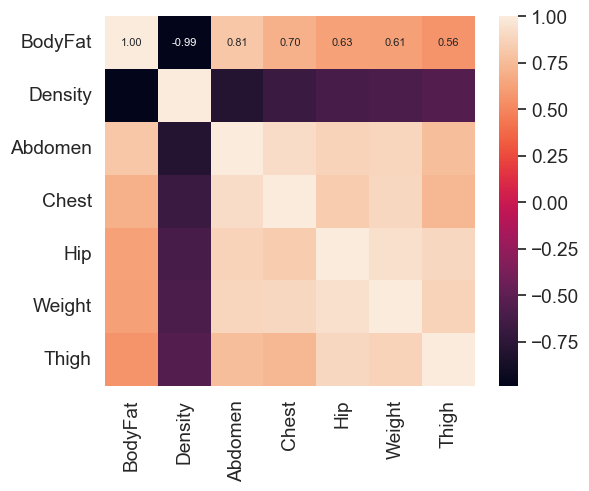

In [130]:
corrmat2 = bf_corr.corr()

k=7
cols=abs(corrmat2).nlargest(k,'BodyFat')['BodyFat'].index
cm=np.corrcoef(bf_corr[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8},
yticklabels=cols.values,xticklabels=cols.values)
plt.show()

In [131]:
bf_corr = bf_corr[cols]

e:\Apps\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Apps\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Apps\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Apps\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

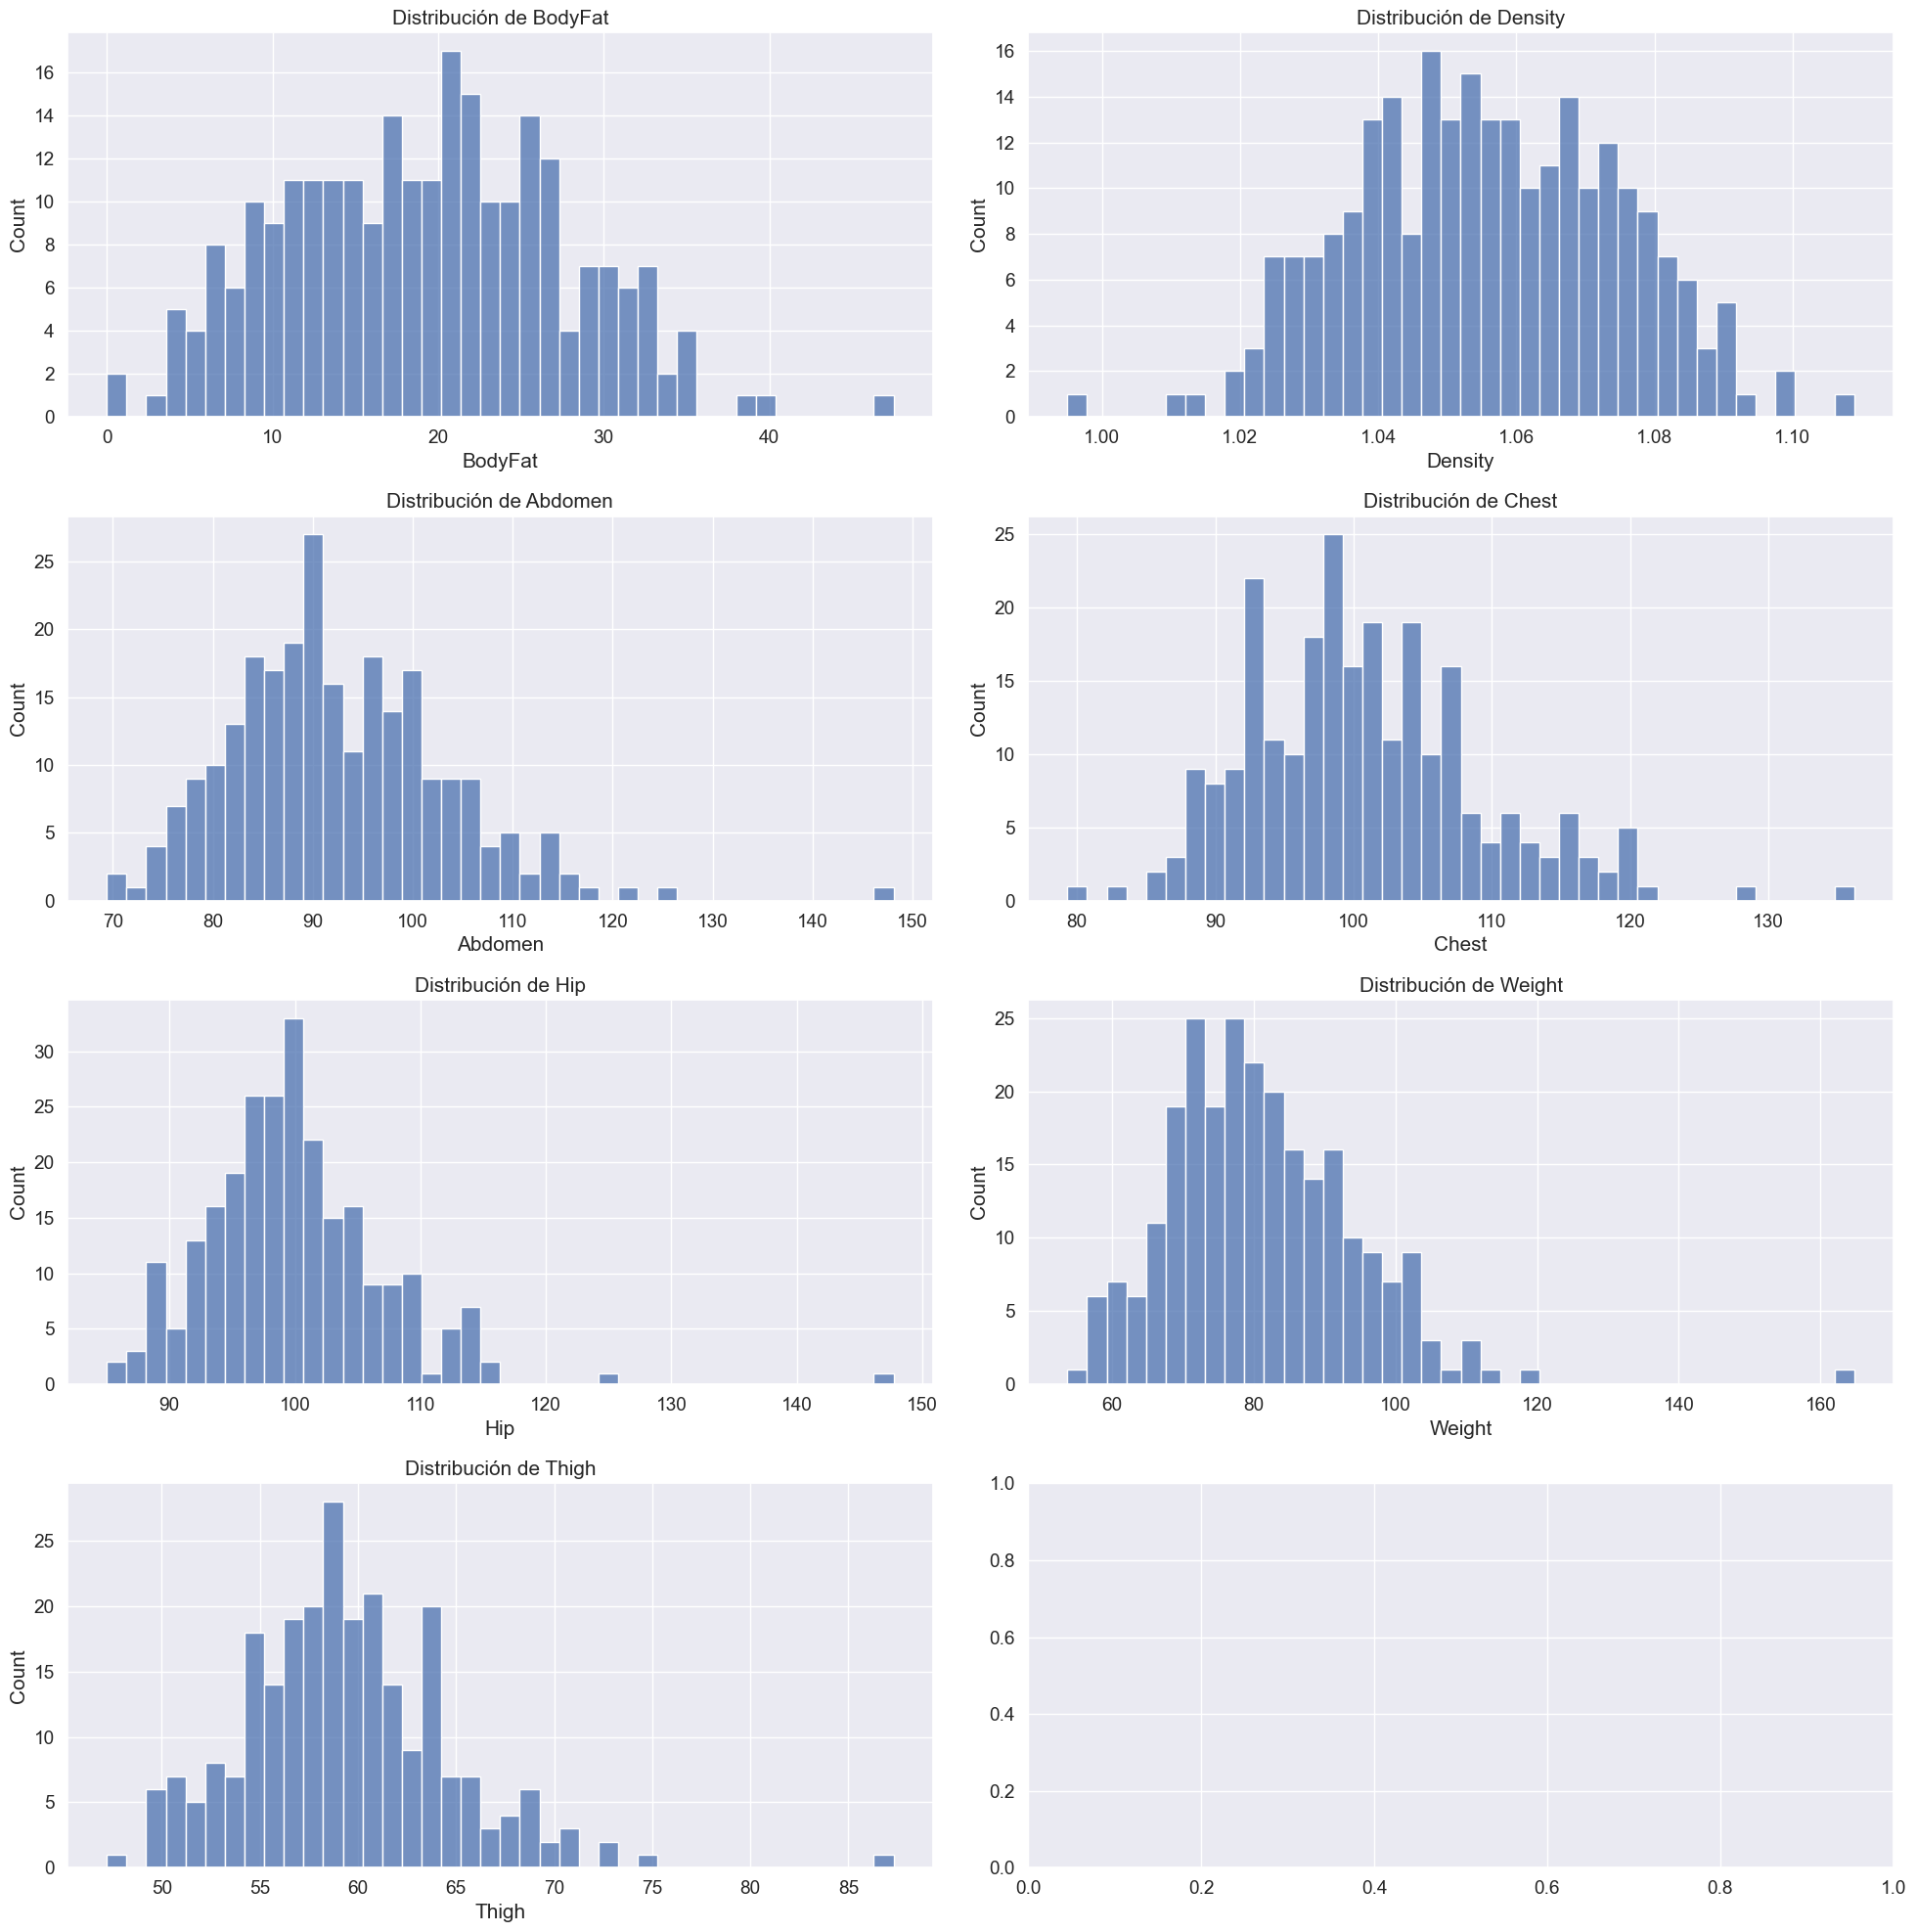

In [132]:
fig, ax = plt.subplots(4,2, figsize=(20,20))
ax = ax.flatten()


for i, var in enumerate(cols):
    sns.histplot(bf_corr[var], ax=ax[i], bins=40)
    ax[i].set_title(f"Distribución de {var}")

plt.tight_layout()
plt.show()

e:\Apps\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Apps\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Apps\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Apps\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

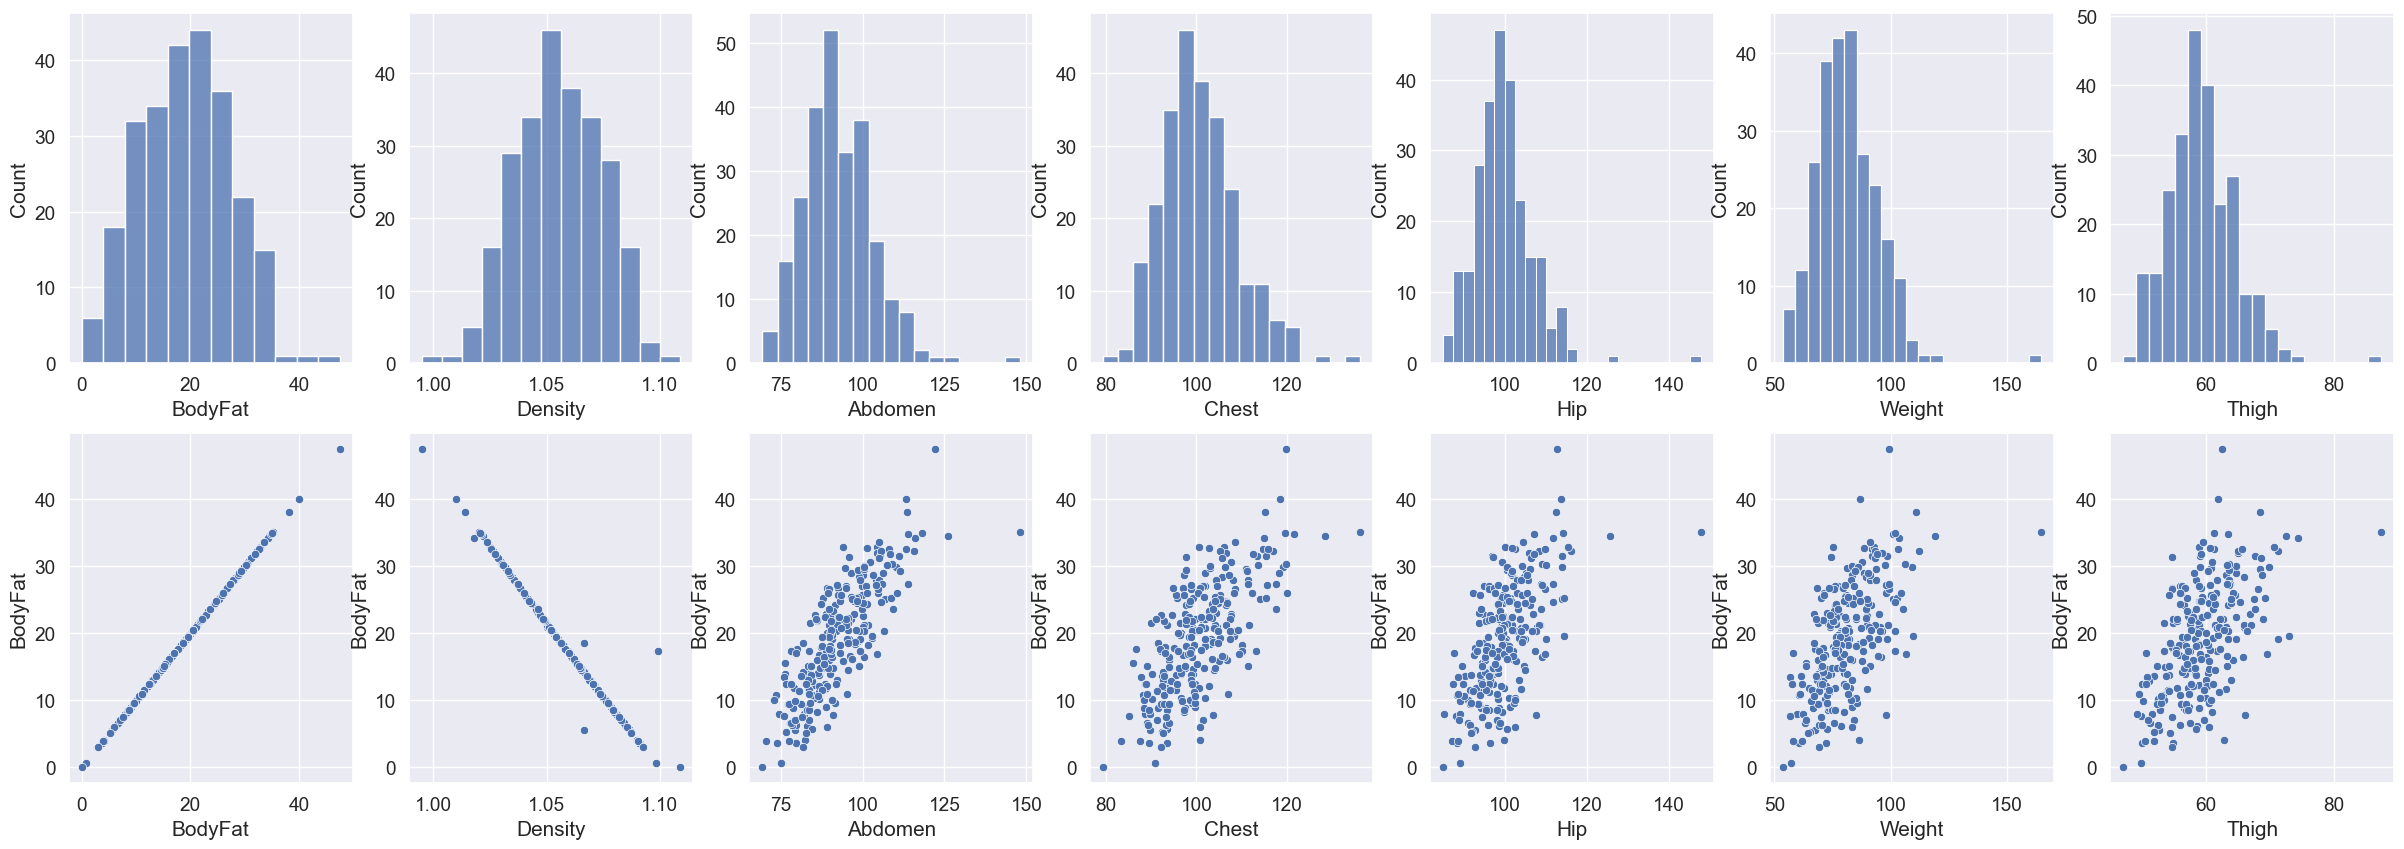

In [133]:
#creo subgráficos con seaborn
fig, ax = plt.subplots(2,len(cols), figsize=(30,10))
i=0
for elem in cols:
    sns.histplot(bf_inicial[elem], ax=ax[0][i])
    i+=1
    # sns.boxplot(data=df[elem], ax=ax[0][i], orient="h", width=0.4)
    # ax[0].set_xlabel(elem)
i=0
    
for elem in cols:
    sns.scatterplot(x=bf_inicial[elem],y=bf_inicial["BodyFat"], ax=ax[1][i])
    # ax[0].set_xlabel(elem)
    i+=1


plt.show()

## observamos que hay un outliner muy marcado asi qeu lo eliminaremos

In [134]:
bf_hist = bf_corr.drop(bf_corr[bf_corr.Weight>120].index, axis=0)
bf_corr.drop(bf_corr[bf_corr.Weight>120].index, axis=0, inplace=True)
print(bf_corr.shape, bf_hist.shape)

(251, 7) (251, 7)


C:\Users\garch\AppData\Local\Temp\ipykernel_23080\3218697051.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bf_corr.drop(bf_corr[bf_corr.Weight>120].index, axis=0, inplace=True)


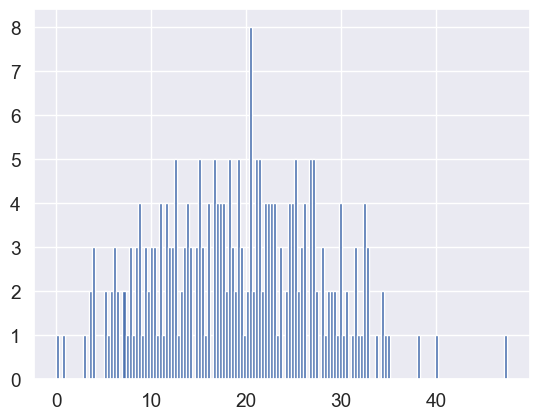

In [135]:
plt.hist(bf_hist.BodyFat.values, bins=150)
plt.show()

## Modelos con density

### Modelo ejemplo Sergio, filtrado y sin outlyers

In [136]:
bf_sergio = bf_hist

w_1:  [-4.32801505e+02  2.88649692e-02 -3.53295997e-04  1.08059659e-02
 -1.21278494e-02 -9.29546573e-03]
w_0:  473.72935469473646
MSE 4.183078938474336
R2 0.9350655171040186
R2 ajustada 0.9294190403304551


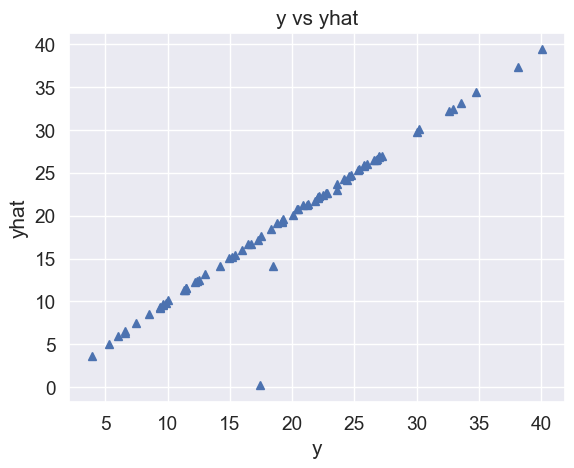

In [137]:
# primero importamos las libresias necesarias para crear el modelo lineal, y las variables a comparar
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# creamos los dataframes de train y de test 
X = bf_sergio.drop(columns="BodyFat")
y = bf_sergio["BodyFat"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# con esto creamo el objeto que va a entrenar a mi modelo
regresion_lineal = linear_model.LinearRegression() # cargo un objeto clase (modelo)
regresion_lineal.fit(X_train, y_train) # se entrena a partir de unos datos


# con los coeficioentes se puede ver el efecto marginal de cada variable
print ('w_1: ', regresion_lineal.coef_) # y = ax+b (a) # variable de las xn
print ('w_0: ', regresion_lineal.intercept_) #y = ax+b (b) # termino independiente, constante

# ahora cargaos en la variable yhat las predicciones de nuestro modelo enternado
yhat = regresion_lineal.predict(X_test)

# printeamos la media cuadrada error para comparar
from sklearn.metrics import mean_squared_error
print("MSE", mean_squared_error(y_test, yhat)) # le paso las y reales y las predicciones

# printeamos el r2 para comparar
from sklearn.metrics import r2_score #r2_score 
# primero sin ajustar la ecuacion
r2_sin_ajustar = r2_score(y_test, yhat)
print("R2", r2_score(y_test, yhat))# le paso las y reales y las predicciones
# despues ajustando la ecuacion
r2_ajustada = 1 - (1-r2_sin_ajustar)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("R2 ajustada", r2_ajustada)

plt.title("y vs yhat")
plt.plot(y_test, yhat, "^")

plt.xlabel("y")
plt.ylabel("yhat")
plt.show()

### Modelo, filtrado y con outlyers

In [138]:
bf_modelo2 = bf_corr

w_1:  [-4.40125317e+02  1.02772018e-02 -4.49432474e-03  2.64766279e-02
 -9.96703423e-03 -2.91011654e-02]
w_0:  483.1049639293073
MSE 5.087348276740658
R2 0.9331124647370435
R2 ajustada 0.9272961573228733


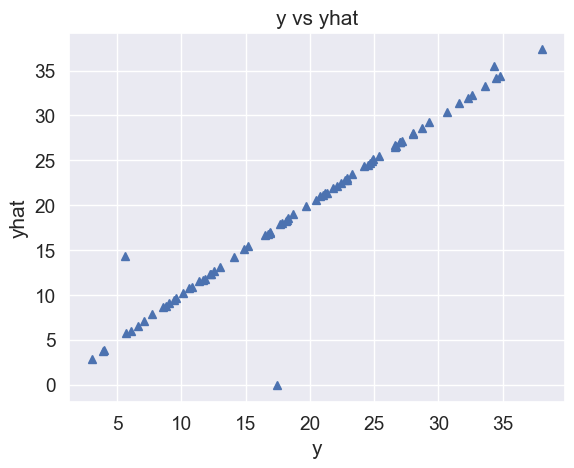

In [139]:
# primero importamos las libresias necesarias para crear el modelo lineal, y las variables a comparar
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# creamos los dataframes de train y de test 
X = bf_modelo2.drop(columns="BodyFat")
y = bf_modelo2["BodyFat"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# con esto creamo el objeto que va a entrenar a mi modelo
regresion_lineal = linear_model.LinearRegression() # cargo un objeto clase (modelo)
regresion_lineal.fit(X_train, y_train) # se entrena a partir de unos datos


# con los coeficioentes se puede ver el efecto marginal de cada variable
print ('w_1: ', regresion_lineal.coef_) # y = ax+b (a) # variable de las xn
print ('w_0: ', regresion_lineal.intercept_) #y = ax+b (b) # termino independiente, constante

# ahora cargaos en la variable yhat las predicciones de nuestro modelo enternado
yhat = regresion_lineal.predict(X_test)

# printeamos la media cuadrada error para comparar
from sklearn.metrics import mean_squared_error
print("MSE", mean_squared_error(y_test, yhat)) # le paso las y reales y las predicciones

# printeamos el r2 para comparar
from sklearn.metrics import r2_score #r2_score 
# primero sin ajustar la ecuacion
r2_sin_ajustar = r2_score(y_test, yhat)
print("R2", r2_score(y_test, yhat))# le paso las y reales y las predicciones
# despues ajustando la ecuacion
r2_ajustada = 1 - (1-r2_sin_ajustar)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("R2 ajustada", r2_ajustada)

plt.title("y vs yhat")
plt.plot(y_test, yhat, "^")

plt.xlabel("y")
plt.ylabel("yhat")
plt.show()

### Modelo con todas las variables y con outlayer

In [140]:
bf_modelo3 = bf_inicial

w_1:  [-4.05636906e+02  9.34421396e-03  3.63890634e-02 -1.03241269e-03
 -6.80062753e-02  2.97224087e-02  2.51386375e-02  1.61602518e-02
 -5.50527933e-02  5.20846497e-02 -1.16796693e-01 -7.69482400e-02
  3.61565920e-02  5.32364124e-02]
w_0:  444.2980409403442
MSE 1.5096965173622359
R2 0.9702860558254216
R2 ajustada 0.9634664620804364


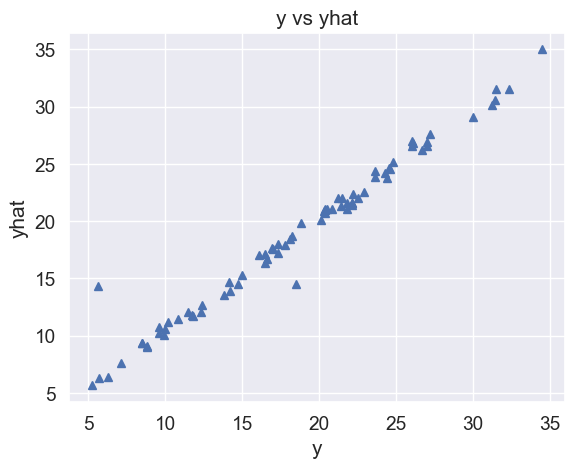

In [141]:
# primero importamos las libresias necesarias para crear el modelo lineal, y las variables a comparar
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# creamos los dataframes de train y de test 
X = bf_modelo3.drop(columns="BodyFat")
y = bf_modelo3["BodyFat"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# con esto creamo el objeto que va a entrenar a mi modelo
regresion_lineal = linear_model.LinearRegression() # cargo un objeto clase (modelo)
regresion_lineal.fit(X_train, y_train) # se entrena a partir de unos datos


# con los coeficioentes se puede ver el efecto marginal de cada variable
print ('w_1: ', regresion_lineal.coef_) # y = ax+b (a) # variable de las xn
print ('w_0: ', regresion_lineal.intercept_) #y = ax+b (b) # termino independiente, constante

# ahora cargaos en la variable yhat las predicciones de nuestro modelo enternado
yhat = regresion_lineal.predict(X_test)

# printeamos la media cuadrada error para comparar
from sklearn.metrics import mean_squared_error
print("MSE", mean_squared_error(y_test, yhat)) # le paso las y reales y las predicciones

# printeamos el r2 para comparar
from sklearn.metrics import r2_score #r2_score 
# primero sin ajustar la ecuacion
r2_sin_ajustar = r2_score(y_test, yhat)
print("R2", r2_score(y_test, yhat))# le paso las y reales y las predicciones
# despues ajustando la ecuacion
r2_ajustada = 1 - (1-r2_sin_ajustar)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("R2 ajustada", r2_ajustada)

plt.title("y vs yhat")
plt.plot(y_test, yhat, "^")

plt.xlabel("y")
plt.ylabel("yhat")
plt.show()

## Modelos sin density

### Modelo ejemplo Sergio, filtrado y sin outlyers

In [142]:
bf_sergio_2 = bf_hist.drop(columns="Density")

w_1:  [ 0.95621918  0.06978965  0.05930639 -0.41596808  0.23374589]
w_0:  -62.9030140232728
MSE 21.098358566647896
R2 0.6646066264539634
R2 ajustada 0.6406499569149608


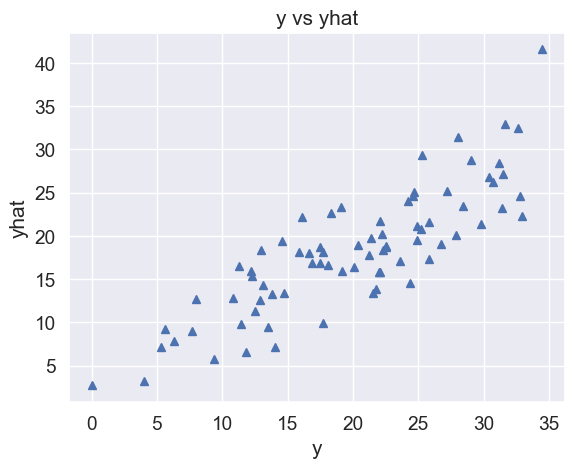

In [143]:
# primero importamos las libresias necesarias para crear el modelo lineal, y las variables a comparar
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# creamos los dataframes de train y de test 
X = bf_sergio_2.drop(columns="BodyFat")
y = bf_sergio_2["BodyFat"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# con esto creamo el objeto que va a entrenar a mi modelo
regresion_lineal = linear_model.LinearRegression() # cargo un objeto clase (modelo)
regresion_lineal.fit(X_train, y_train) # se entrena a partir de unos datos


# con los coeficioentes se puede ver el efecto marginal de cada variable
print ('w_1: ', regresion_lineal.coef_) # y = ax+b (a) # variable de las xn
print ('w_0: ', regresion_lineal.intercept_) #y = ax+b (b) # termino independiente, constante

# ahora cargaos en la variable yhat las predicciones de nuestro modelo enternado
yhat = regresion_lineal.predict(X_test)

# printeamos la media cuadrada error para comparar
from sklearn.metrics import mean_squared_error
print("MSE", mean_squared_error(y_test, yhat)) # le paso las y reales y las predicciones

# printeamos el r2 para comparar
from sklearn.metrics import r2_score #r2_score 
# primero sin ajustar la ecuacion
r2_sin_ajustar = r2_score(y_test, yhat)
print("R2", r2_score(y_test, yhat))# le paso las y reales y las predicciones
# despues ajustando la ecuacion
r2_ajustada = 1 - (1-r2_sin_ajustar)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("R2 ajustada", r2_ajustada)

plt.title("y vs yhat")
plt.plot(y_test, yhat, "^")

plt.xlabel("y")
plt.ylabel("yhat")
plt.show()

### Modelo, filtrado y con outlyers

In [144]:
bf_modelo2_2 = bf_corr.drop(columns="Density")

w_1:  [ 1.02568275 -0.05420196  0.00297235 -0.40129947  0.25676425]
w_0:  -53.087930680364224
MSE 20.381529702497815
R2 0.6967992583879352
R2 ajustada 0.6751420625585021


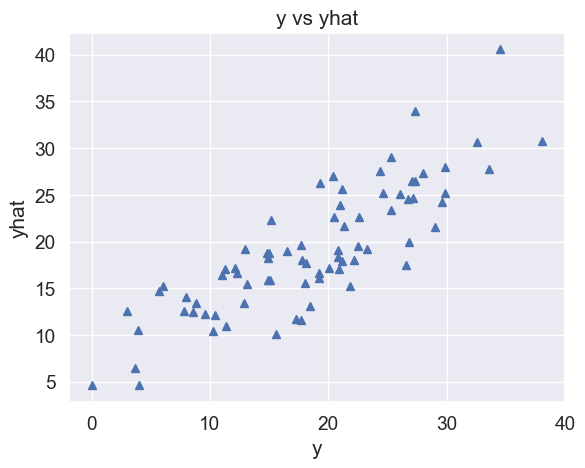

In [145]:
# primero importamos las libresias necesarias para crear el modelo lineal, y las variables a comparar
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# creamos los dataframes de train y de test 
X = bf_modelo2_2.drop(columns="BodyFat")
y = bf_modelo2_2["BodyFat"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# con esto creamo el objeto que va a entrenar a mi modelo
regresion_lineal = linear_model.LinearRegression() # cargo un objeto clase (modelo)
regresion_lineal.fit(X_train, y_train) # se entrena a partir de unos datos


# con los coeficioentes se puede ver el efecto marginal de cada variable
print ('w_1: ', regresion_lineal.coef_) # y = ax+b (a) # variable de las xn
print ('w_0: ', regresion_lineal.intercept_) #y = ax+b (b) # termino independiente, constante

# ahora cargaos en la variable yhat las predicciones de nuestro modelo enternado
yhat = regresion_lineal.predict(X_test)

# printeamos la media cuadrada error para comparar
from sklearn.metrics import mean_squared_error
print("MSE", mean_squared_error(y_test, yhat)) # le paso las y reales y las predicciones

# printeamos el r2 para comparar
from sklearn.metrics import r2_score #r2_score 
# primero sin ajustar la ecuacion
r2_sin_ajustar = r2_score(y_test, yhat)
print("R2", r2_score(y_test, yhat))# le paso las y reales y las predicciones
# despues ajustando la ecuacion
r2_ajustada = 1 - (1-r2_sin_ajustar)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("R2 ajustada", r2_ajustada)

plt.title("y vs yhat")
plt.plot(y_test, yhat, "^")

plt.xlabel("y")
plt.ylabel("yhat")
plt.show()

### Modelo con todas las variables y con outlayer

In [146]:
bf_modelo3_2 = bf_inicial.drop(columns="Density")

w_1:  [ 0.07883648 -0.05101473 -0.11212207 -0.47308301 -0.13077488  0.8460416
 -0.05867342  0.28136455 -0.25883109  0.30172008  0.19720787  0.31824141
 -1.94364954]
w_0:  4.584677518285661
MSE 25.2359922175258
R2 0.6899352446204416
R2 ajustada 0.6249216668795665


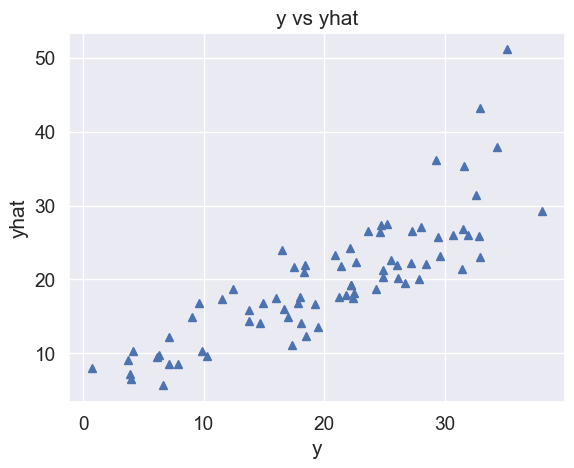

In [147]:
# primero importamos las libresias necesarias para crear el modelo lineal, y las variables a comparar
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# creamos los dataframes de train y de test 
X = bf_modelo3_2.drop(columns="BodyFat")
y = bf_modelo3_2["BodyFat"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# con esto creamo el objeto que va a entrenar a mi modelo
regresion_lineal = linear_model.LinearRegression() # cargo un objeto clase (modelo)
regresion_lineal.fit(X_train, y_train) # se entrena a partir de unos datos


# con los coeficioentes se puede ver el efecto marginal de cada variable
print ('w_1: ', regresion_lineal.coef_) # y = ax+b (a) # variable de las xn
print ('w_0: ', regresion_lineal.intercept_) #y = ax+b (b) # termino independiente, constante

# ahora cargaos en la variable yhat las predicciones de nuestro modelo enternado
yhat = regresion_lineal.predict(X_test)

# printeamos la media cuadrada error para comparar
from sklearn.metrics import mean_squared_error
print("MSE", mean_squared_error(y_test, yhat)) # le paso las y reales y las predicciones

# printeamos el r2 para comparar
from sklearn.metrics import r2_score #r2_score 
# primero sin ajustar la ecuacion
r2_sin_ajustar = r2_score(y_test, yhat)
print("R2", r2_score(y_test, yhat))# le paso las y reales y las predicciones
# despues ajustando la ecuacion
r2_ajustada = 1 - (1-r2_sin_ajustar)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("R2 ajustada", r2_ajustada)

plt.title("y vs yhat")
plt.plot(y_test, yhat, "^")

plt.xlabel("y")
plt.ylabel("yhat")
plt.show()

# Escalamos(si es necesario, cuando las variables no estan en la misma magnitud)

In [148]:
#  cuando escalamos poneos la normal en 0 

from sklearn.preprocessing import StandardScaler
objeto_escalador1 = StandardScaler()
objeto_escalador1.fit(bf_hist)
bf_esc1= objeto_escalador1.transform(bf_hist) #esto aplica la transformación al df final
bf_nor1=pd.DataFrame(bf_esc1, columns=bf_hist.columns)

objeto_escalador2 = StandardScaler()
objeto_escalador2.fit(bf_corr)
bf_esc2= objeto_escalador2.transform(bf_corr) #esto aplica la transformación al df final
bf_nor2=pd.DataFrame(bf_esc2, columns=bf_corr.columns)

objeto_escalador3 = StandardScaler()
objeto_escalador3.fit(bf_inicial)
bf_esc3= objeto_escalador3.transform(bf_inicial) #esto aplica la transformación al df final
bf_nor3=pd.DataFrame(bf_esc3, columns=bf_inicial.columns)

In [149]:
# ahora metemos el modelo lineal

## Modelos con density y escalado

### Modelo ejemplo Sergio, filtrado y sin outlyers

In [150]:
bf_sergio_4 = bf_nor1

w_1:  [-0.90669488  0.0725005   0.0474913   0.02033223 -0.02016022 -0.0194689 ]
w_0:  -0.002258892183849552
MSE 0.011937759254591484
R2 0.9861777566917406
R2 ajustada 0.9849758224910223


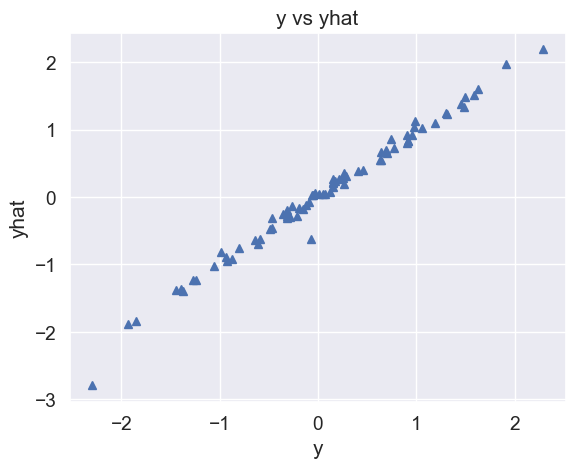

In [151]:
# primero importamos las libresias necesarias para crear el modelo lineal, y las variables a comparar
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# creamos los dataframes de train y de test 
X = bf_sergio_4.drop(columns="BodyFat")
y = bf_sergio_4["BodyFat"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# con esto creamo el objeto que va a entrenar a mi modelo
regresion_lineal = linear_model.LinearRegression() # cargo un objeto clase (modelo)
regresion_lineal.fit(X_train, y_train) # se entrena a partir de unos datos


# con los coeficioentes se puede ver el efecto marginal de cada variable
print ('w_1: ', regresion_lineal.coef_) # y = ax+b (a) # variable de las xn
print ('w_0: ', regresion_lineal.intercept_) #y = ax+b (b) # termino independiente, constante

# ahora cargaos en la variable yhat las predicciones de nuestro modelo enternado
yhat = regresion_lineal.predict(X_test)

# printeamos la media cuadrada error para comparar
from sklearn.metrics import mean_squared_error
print("MSE", mean_squared_error(y_test, yhat)) # le paso las y reales y las predicciones

# printeamos el r2 para comparar
from sklearn.metrics import r2_score #r2_score 
# primero sin ajustar la ecuacion
r2_sin_ajustar = r2_score(y_test, yhat)
print("R2", r2_score(y_test, yhat))# le paso las y reales y las predicciones
# despues ajustando la ecuacion
r2_ajustada = 1 - (1-r2_sin_ajustar)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("R2 ajustada", r2_ajustada)

plt.title("y vs yhat")
plt.plot(y_test, yhat, "^")

plt.xlabel("y")
plt.ylabel("yhat")
plt.show()

### Modelo, filtrado y con outlyers

In [152]:
bf_modelo2_4 = bf_nor2

w_1:  [-0.90196952  0.07820661  0.03456919  0.02850951 -0.00893188 -0.04054976]
w_0:  0.004483481617371983
MSE 0.005169994965801804
R2 0.9952970227525848
R2 ajustada 0.9948880682093313


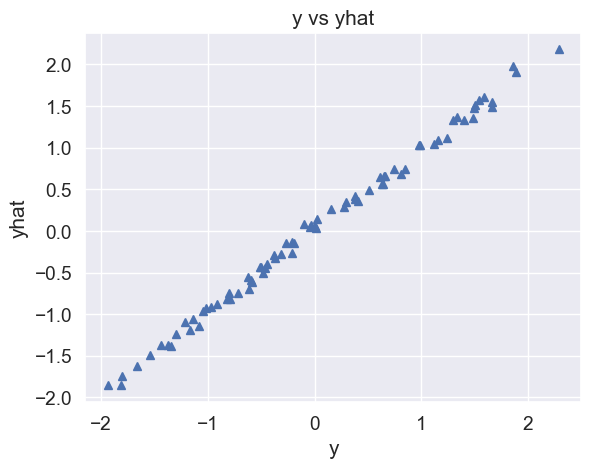

In [153]:
# primero importamos las libresias necesarias para crear el modelo lineal, y las variables a comparar
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# creamos los dataframes de train y de test 
X = bf_modelo2_4.drop(columns="BodyFat")
y = bf_modelo2_4["BodyFat"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# con esto creamo el objeto que va a entrenar a mi modelo
regresion_lineal = linear_model.LinearRegression() # cargo un objeto clase (modelo)
regresion_lineal.fit(X_train, y_train) # se entrena a partir de unos datos


# con los coeficioentes se puede ver el efecto marginal de cada variable
print ('w_1: ', regresion_lineal.coef_) # y = ax+b (a) # variable de las xn
print ('w_0: ', regresion_lineal.intercept_) #y = ax+b (b) # termino independiente, constante

# ahora cargaos en la variable yhat las predicciones de nuestro modelo enternado
yhat = regresion_lineal.predict(X_test)

# printeamos la media cuadrada error para comparar
from sklearn.metrics import mean_squared_error
print("MSE", mean_squared_error(y_test, yhat)) # le paso las y reales y las predicciones

# printeamos el r2 para comparar
from sklearn.metrics import r2_score #r2_score 
# primero sin ajustar la ecuacion
r2_sin_ajustar = r2_score(y_test, yhat)
print("R2", r2_score(y_test, yhat))# le paso las y reales y las predicciones
# despues ajustando la ecuacion
r2_ajustada = 1 - (1-r2_sin_ajustar)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("R2 ajustada", r2_ajustada)

plt.title("y vs yhat")
plt.plot(y_test, yhat, "^")

plt.xlabel("y")
plt.ylabel("yhat")
plt.show()

### Modelo con todas las variables y con outlayer

In [154]:
bf_modelo3_4 = bf_nor3

w_1:  [-0.98876479  0.01050842 -0.00166454 -0.00799302  0.01322906 -0.00891378
  0.01719695  0.02360286 -0.01035454 -0.01369053  0.0034201   0.0060557
  0.00116917 -0.01582716]
w_0:  -0.009992989164053466
MSE 0.0584582936447314
R2 0.9348531113741545
R2 ajustada 0.9199013664436326


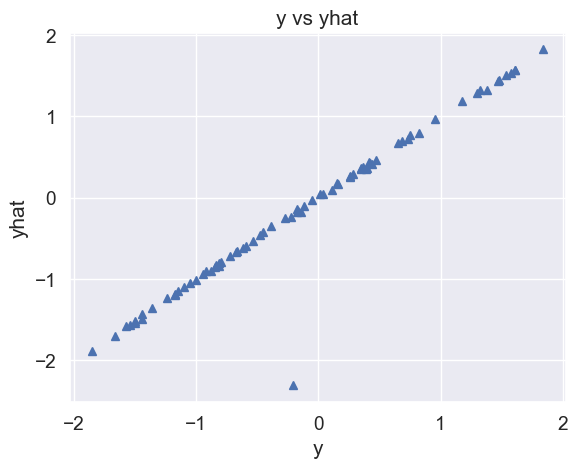

In [155]:
# primero importamos las libresias necesarias para crear el modelo lineal, y las variables a comparar
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# creamos los dataframes de train y de test 
X = bf_modelo3_4.drop(columns="BodyFat")
y = bf_modelo3_4["BodyFat"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# con esto creamo el objeto que va a entrenar a mi modelo
regresion_lineal = linear_model.LinearRegression() # cargo un objeto clase (modelo)
regresion_lineal.fit(X_train, y_train) # se entrena a partir de unos datos


# con los coeficioentes se puede ver el efecto marginal de cada variable
print ('w_1: ', regresion_lineal.coef_) # y = ax+b (a) # variable de las xn
print ('w_0: ', regresion_lineal.intercept_) #y = ax+b (b) # termino independiente, constante

# ahora cargaos en la variable yhat las predicciones de nuestro modelo enternado
yhat = regresion_lineal.predict(X_test)

# printeamos la media cuadrada error para comparar
from sklearn.metrics import mean_squared_error
print("MSE", mean_squared_error(y_test, yhat)) # le paso las y reales y las predicciones

# printeamos el r2 para comparar
from sklearn.metrics import r2_score #r2_score 
# primero sin ajustar la ecuacion
r2_sin_ajustar = r2_score(y_test, yhat)
print("R2", r2_score(y_test, yhat))# le paso las y reales y las predicciones
# despues ajustando la ecuacion
r2_ajustada = 1 - (1-r2_sin_ajustar)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("R2 ajustada", r2_ajustada)

plt.title("y vs yhat")
plt.plot(y_test, yhat, "^")

plt.xlabel("y")
plt.ylabel("yhat")
plt.show()

## Modelos sin density y escalado

### Modelo ejemplo Sergio, filtrado y sin outlyers

In [156]:
bf_sergio_3 = bf_nor1.drop(columns="Density")

w_1:  [ 1.23663842 -0.09860837 -0.11126118 -0.37983308  0.13654257]
w_0:  -0.007235037277760856
MSE 0.3161216206324556
R2 0.6991132372055967
R2 ajustada 0.677621325577425


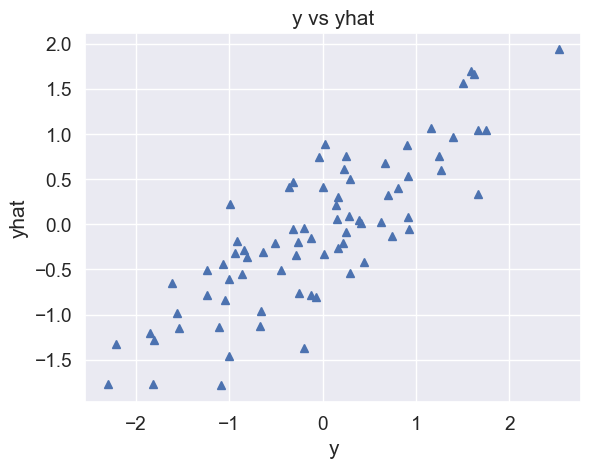

In [157]:
# primero importamos las libresias necesarias para crear el modelo lineal, y las variables a comparar
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# creamos los dataframes de train y de test 
X = bf_sergio_3.drop(columns="BodyFat")
y = bf_sergio_3["BodyFat"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# con esto creamo el objeto que va a entrenar a mi modelo
regresion_lineal = linear_model.LinearRegression() # cargo un objeto clase (modelo)
regresion_lineal.fit(X_train, y_train) # se entrena a partir de unos datos


# con los coeficioentes se puede ver el efecto marginal de cada variable
print ('w_1: ', regresion_lineal.coef_) # y = ax+b (a) # variable de las xn
print ('w_0: ', regresion_lineal.intercept_) #y = ax+b (b) # termino independiente, constante

# ahora cargaos en la variable yhat las predicciones de nuestro modelo enternado
yhat = regresion_lineal.predict(X_test)

# printeamos la media cuadrada error para comparar
from sklearn.metrics import mean_squared_error
print("MSE", mean_squared_error(y_test, yhat)) # le paso las y reales y las predicciones

# printeamos el r2 para comparar
from sklearn.metrics import r2_score #r2_score 
# primero sin ajustar la ecuacion
r2_sin_ajustar = r2_score(y_test, yhat)
print("R2", r2_score(y_test, yhat))# le paso las y reales y las predicciones
# despues ajustando la ecuacion
r2_ajustada = 1 - (1-r2_sin_ajustar)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("R2 ajustada", r2_ajustada)

plt.title("y vs yhat")
plt.plot(y_test, yhat, "^")

plt.xlabel("y")
plt.ylabel("yhat")
plt.show()

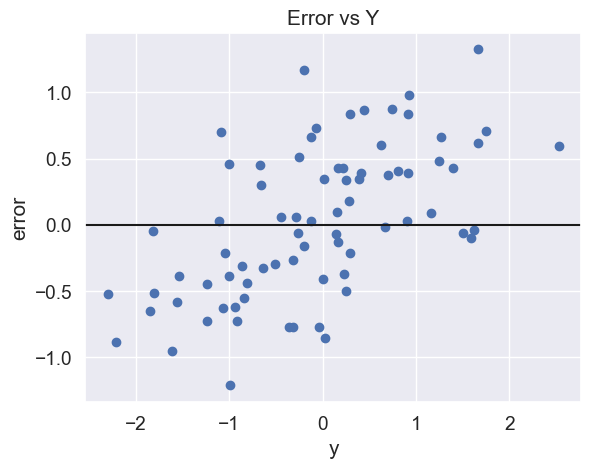

In [158]:
error = y_test-yhat
plt.title("Error vs Y")
plt.plot(y_test,error,"o")
# plt.plot([0,0],[450,0],"b")
plt.axhline(y=0, color="k")
plt.xlabel("y")
plt.ylabel("error")
plt.show()

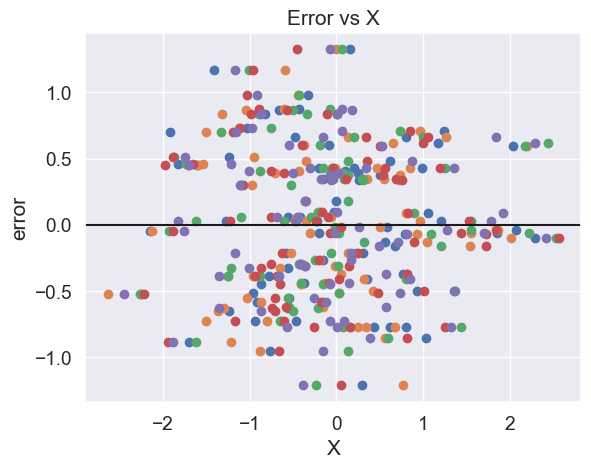

In [159]:
error = y_test-yhat
plt.title("Error vs X")
plt.plot(X_test,error,"o")
# plt.plot([0,0],[450,0],"b")
plt.axhline(y=0, color="k")
plt.xlabel("X")
plt.ylabel("error")
plt.show()

### Modelo, filtrado y con outlyers

In [160]:
bf_modelo2_3 = bf_nor2.drop(columns="Density")

w_1:  [ 1.26040594  0.05558324 -0.07488881 -0.55532569  0.10862774]
w_0:  0.035201090811594005
MSE 0.28150026037894915
R2 0.701885296103691
R2 ajustada 0.6805913886825261


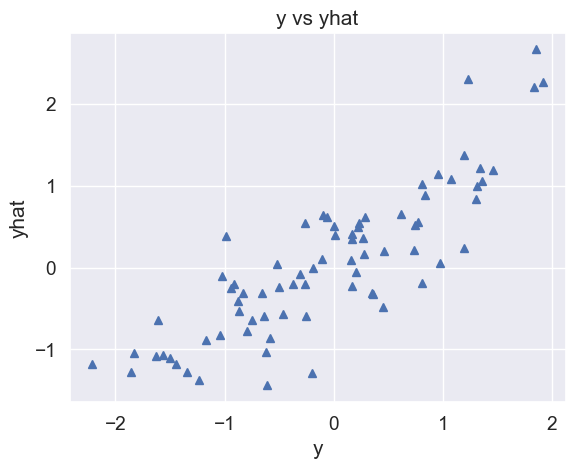

In [161]:
# primero importamos las libresias necesarias para crear el modelo lineal, y las variables a comparar
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# creamos los dataframes de train y de test 
X = bf_modelo2_3.drop(columns="BodyFat")
y = bf_modelo2_3["BodyFat"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# con esto creamo el objeto que va a entrenar a mi modelo
regresion_lineal = linear_model.LinearRegression() # cargo un objeto clase (modelo)
regresion_lineal.fit(X_train, y_train) # se entrena a partir de unos datos


# con los coeficioentes se puede ver el efecto marginal de cada variable
print ('w_1: ', regresion_lineal.coef_) # y = ax+b (a) # variable de las xn
print ('w_0: ', regresion_lineal.intercept_) #y = ax+b (b) # termino independiente, constante

# ahora cargaos en la variable yhat las predicciones de nuestro modelo enternado
yhat = regresion_lineal.predict(X_test)

# printeamos la media cuadrada error para comparar
from sklearn.metrics import mean_squared_error
print("MSE", mean_squared_error(y_test, yhat)) # le paso las y reales y las predicciones

# printeamos el r2 para comparar
from sklearn.metrics import r2_score #r2_score 
# primero sin ajustar la ecuacion
r2_sin_ajustar = r2_score(y_test, yhat)
print("R2", r2_score(y_test, yhat))# le paso las y reales y las predicciones
# despues ajustando la ecuacion
r2_ajustada = 1 - (1-r2_sin_ajustar)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("R2 ajustada", r2_ajustada)

plt.title("y vs yhat")
plt.plot(y_test, yhat, "^")

plt.xlabel("y")
plt.ylabel("yhat")
plt.show()

### Modelo con todas las variables y con outlayer

In [162]:
bf_modelo3_3 = bf_nor3.drop(columns="Density")

w_1:  [ 0.11031318 -0.22446045 -0.04188423 -0.16617629 -0.00286587  1.24315281
 -0.22240853  0.11495894 -0.04521651  0.01871536  0.08110803  0.1740055
 -0.19744052]
w_0:  -0.01726562725984575
MSE 0.3022580426727491
R2 0.7058131113336757
R2 ajustada 0.6441287637100916


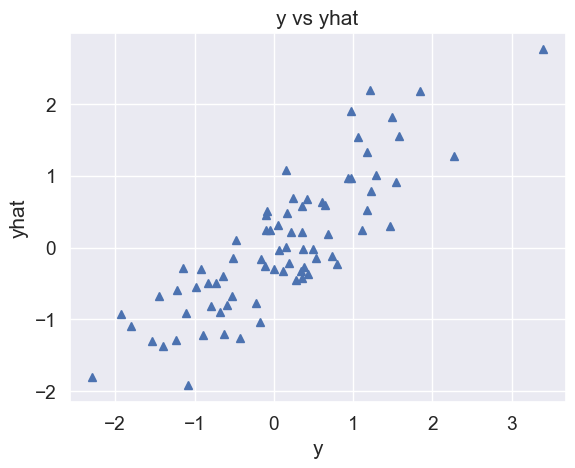

In [163]:
# primero importamos las libresias necesarias para crear el modelo lineal, y las variables a comparar
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# creamos los dataframes de train y de test 
X = bf_modelo3_3.drop(columns="BodyFat")
y = bf_modelo3_3["BodyFat"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# con esto creamo el objeto que va a entrenar a mi modelo
regresion_lineal = linear_model.LinearRegression() # cargo un objeto clase (modelo)
regresion_lineal.fit(X_train, y_train) # se entrena a partir de unos datos


# con los coeficioentes se puede ver el efecto marginal de cada variable
print ('w_1: ', regresion_lineal.coef_) # y = ax+b (a) # variable de las xn
print ('w_0: ', regresion_lineal.intercept_) #y = ax+b (b) # termino independiente, constante

# ahora cargaos en la variable yhat las predicciones de nuestro modelo enternado
yhat = regresion_lineal.predict(X_test)
yhat_train = regresion_lineal.predict(X_train)

# printeamos la media cuadrada error para comparar
from sklearn.metrics import mean_squared_error
print("MSE", mean_squared_error(y_test, yhat)) # le paso las y reales y las predicciones

# printeamos el r2 para comparar
from sklearn.metrics import r2_score #r2_score 
# primero sin ajustar la ecuacion
r2_sin_ajustar = r2_score(y_test, yhat)
print("R2", r2_score(y_test, yhat))# le paso las y reales y las predicciones
# despues ajustando la ecuacion
r2_ajustada = 1 - (1-r2_sin_ajustar)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("R2 ajustada", r2_ajustada)

plt.title("y vs yhat")
plt.plot(y_test, yhat, "^")

plt.xlabel("y")
plt.ylabel("yhat")
plt.show()

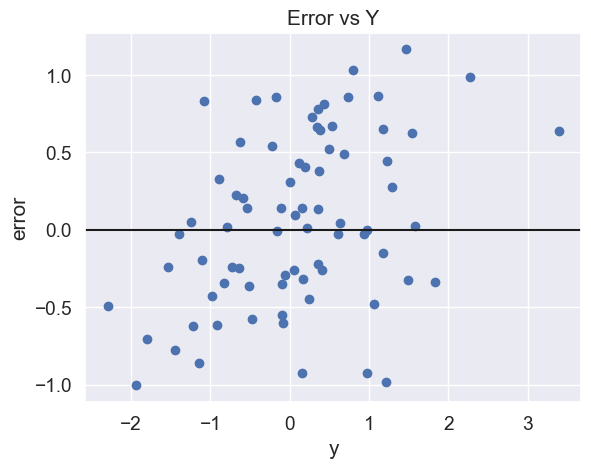

In [164]:
error = y_test-yhat
plt.title("Error vs Y")
plt.plot(y_test,error,"o")
# plt.plot([0,0],[450,0],"b")
plt.axhline(y=0, color="k")
plt.xlabel("y")
plt.ylabel("error")
plt.show()

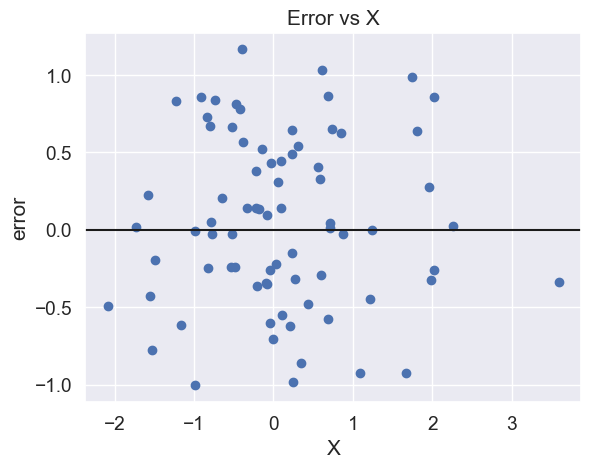

In [165]:
error = y_test-yhat
plt.title("Error vs X")
plt.plot(X_test.Hip,error,"o")
# plt.plot([0,0],[450,0],"b")
plt.axhline(y=0, color="k")
plt.xlabel("X")
plt.ylabel("error")
plt.show()